In [4]:
import pandas as pd

dirty_iris = pd.read_csv('iris_dirty.csv')

# Step 1: Calculate the number and percentage of complete observations
num_complete = dirty_iris.dropna().shape[0]
total_observations = dirty_iris.shape[0]
percentage_complete = (num_complete / total_observations) * 100

print(f"Number of complete observations: {num_complete}")
print(f"Percentage of complete observations: {percentage_complete:.2f}%")

# Step 2: Replace special values with NA (assuming special values are known)
# Replace special values (e.g., -999, '?', etc.) with NaN
special_values = ["?", -999]  # Add other special values if needed
dirty_iris.replace(special_values, float("NaN"), inplace=True)

dirty_iris

Number of complete observations: 131
Percentage of complete observations: 87.33%


,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [2]:
class IrisConstraints:
    def __init__(self):
        self.species_values = ["setosa", "versicolor", "virginica"]
        self.numerical_properties = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

    def validate_species(self, species):
        return species in self.species_values

    def validate_numerical_properties(self, sepal_length, sepal_width, petal_length, petal_width):
        return all(prop > 0 for prop in [sepal_length, sepal_width, petal_length, petal_width])

    def validate_petal_length(self, petal_length, petal_width):
        return petal_length >= 2 * petal_width

    def validate_sepal_length(self, sepal_length):
        return sepal_length <= 30

    def validate_sepals_vs_petals(self, sepal_length, petal_length):
        return sepal_length > petal_length

# Instantiate the constraint object
iris_constraints = IrisConstraints()

# Example usage:
species = "setosa"
sepal_length = 25.0
sepal_width = 3.5
petal_length = 5.0
petal_width = 1.5

print(f"Species validation: {iris_constraints.validate_species(species)}")
print(f"Numerical properties validation: {iris_constraints.validate_numerical_properties(sepal_length, sepal_width, petal_length, petal_width)}")
print(f"Petal length validation: {iris_constraints.validate_petal_length(petal_length, petal_width)}")
print(f"Sepal length validation: {iris_constraints.validate_sepal_length(sepal_length)}")
print(f"Sepals vs. petals validation: {iris_constraints.validate_sepals_vs_petals(sepal_length, petal_length)}")


Species validation: True
Numerical properties validation: True
Petal length validation: True
Sepal length validation: True
Sepals vs. petals validation: True


Summary of Rule Violations:
Species Violations: 0 (0.00%)
Numerical Violations: 0 (0.00%)
Petal Length Violations: 0 (0.00%)
Sepal Length Violations: 0 (0.00%)
Sepals vs. Petals Violations: 0 (0.00%)


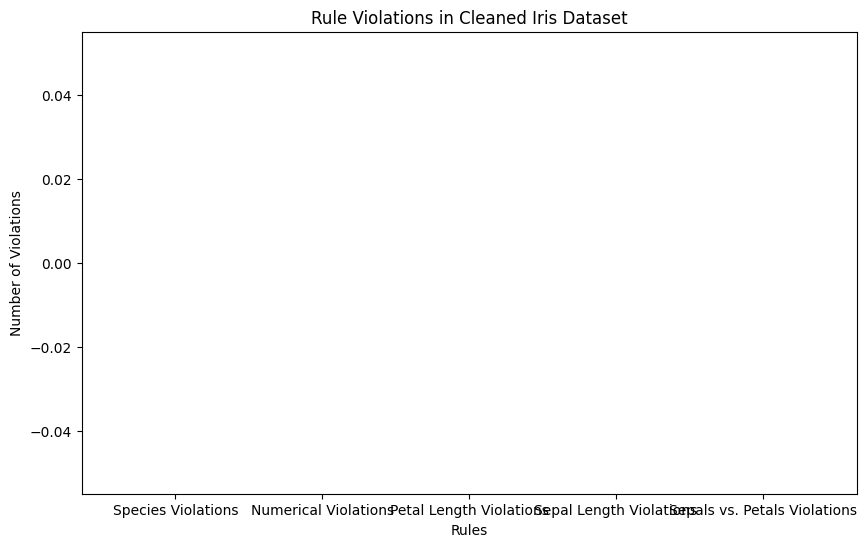

In [10]:
import pandas as pd

cleaned_iris = dirty_iris

# Rule 1: Species Constraint
species_violations = cleaned_iris[~cleaned_iris["Species"].isin(["setosa", "versicolor", "virginica"])]

# Rule 2: Numerical Properties Constraint
numerical_violations = cleaned_iris[
    (cleaned_iris["Sepal.Length"] <= 0)
    | (cleaned_iris["Sepal.Width"] <= 0)
    | (cleaned_iris["Petal.Length"] <= 0)
    | (cleaned_iris["Petal.Width"] <= 0)
]

# Rule 3: Petal Length Constraint
petal_length_violations = cleaned_iris[cleaned_iris["Petal.Length"] < 2 * cleaned_iris["Petal.Width"]]

# Rule 4: Sepal Length Constraint
sepal_length_violations = cleaned_iris[cleaned_iris["Sepal.Length"] > 30]

# Rule 5: Sepals vs. Petals Constraint
sepals_vs_petals_violations = cleaned_iris[cleaned_iris["Sepal.Length"] <= cleaned_iris["Petal.Length"]]

# Summary
total_observations = cleaned_iris.shape[0]
summary = {
    "Species Violations": species_violations.shape[0],
    "Numerical Violations": numerical_violations.shape[0],
    "Petal Length Violations": petal_length_violations.shape[0],
    "Sepal Length Violations": sepal_length_violations.shape[0],
    "Sepals vs. Petals Violations": sepals_vs_petals_violations.shape[0],
}

print("Summary of Rule Violations:")
for rule, violations in summary.items():
    print(f"{rule}: {violations} ({violations / total_observations:.2%})")

# Plot the violations (you can choose an appropriate visualization)
# Example: Bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(summary.keys(), summary.values())
plt.xlabel("Rules")
plt.ylabel("Number of Violations")
plt.title("Rule Violations in Cleaned Iris Dataset")
plt.show()


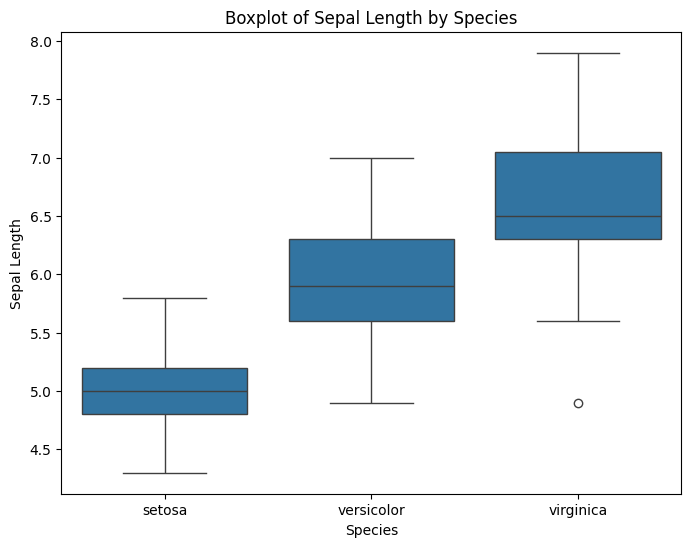

Outliers for virginica species:
Sepal Length: []


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

# Create a boxplot for sepal length
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='Sepal.Length', data=cleaned_iris)
plt.title("Boxplot of Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.show()

# Get statistical information using boxplot_stats
stats = boxplot_stats(cleaned_iris.loc[cleaned_iris.Species.eq('virginica'), "Sepal.Length"])
print("Outliers for virginica species:")
for stat in stats:
    print(f"Sepal Length: {stat['fliers'].tolist()}")
